In [28]:
import warnings, os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from copy import copy
from tqdm import tqdm

from glob import glob

warnings.filterwarnings("ignore")

from matplotlib.ticker import FormatStrFormatter
#gfc = gfc.rename(columns = {'AUS':"AUS", 'CHI':'CHN', 'FRA':'FRA', 'GER':'DEU', 'USA':'USA'})

sns.set(style='white',  font='sans-serif', font_scale=2)  

from statannot import add_stat_annotation


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 3: t-test paired samples with Bonferroni correction, P_val=4.041e-04 stat=-4.162e+00
1 v.s. 10: t-test paired samples with Bonferroni correction, P_val=1.972e-05 stat=-4.932e+00
1 v.s. 18: t-test paired samples with Bonferroni correction, P_val=2.887e-06 stat=-5.389e+00
1 v.s. 23: t-test paired samples with Bonferroni correction, P_val=9.567e-06 stat=-5.106e+00
1 v.s. 49: t-test paired samples with Bonferroni correction, P_val=1.176e-05 stat=-5.057e+00
1 v.s. 68: t-test paired samples with Bonferroni correction, P_val=1.531e-05 stat=-4.993e+00


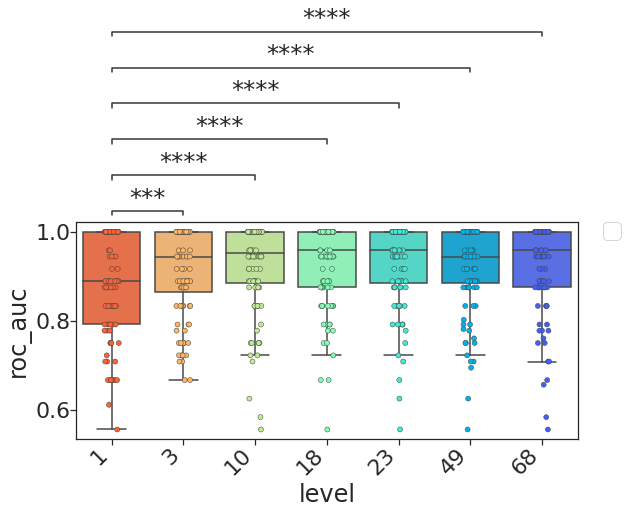

In [29]:
df = pd.read_pickle('./channel_IBD_results/dfres_10FCV_10times_phenotype.pkl')
df1 = df[['level', 'repeat_seed', 'fold']]
df1['roc_auc'] = df.val_auc.apply(lambda x:x[-1])


dfp = df1

x = "level"
y = "roc_auc"
order = df1.level.unique()
color = sns.color_palette("rainbow_r", len(order)) #PiYG

figsize = (9, 4)

box = []
for i in range(len(order)):
    if i == 0:
        continue
    box.append((order[0], order[i]))
    

fig, ax = plt.subplots(figsize = figsize)


sns.boxplot(data=dfp, x=x, y=y, order=order, ax = ax, palette=color, fliersize=0, )
sns.stripplot(data=dfp, x=x, y=y, order=order, ax = ax, jitter=True, 
              size=5, palette=color, split=True,
              linewidth=0.5,edgecolor='gray')

#sns.barplot(data=dfp, x=x, y=y, order=order, hue = hue, hue_order=hue_order, ax = ax, palette="Set2")
# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

add_stat_annotation(ax, data = dfp, x=x, y=y, order=order, plot='boxplot',
                    box_pairs=box,
                    test='t-test_paired', 
                    text_format='star', 
                    loc='outside', verbose=2)

ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)

plt.xticks(rotation=45, ha = 'right')

fig.savefig("./channel_IBD_results/phenotype_control_multichannel.pdf" ,  bbox_inches='tight')


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

grayscale v.s. kingdom: t-test paired samples with Bonferroni correction, P_val=4.273e-03 stat=-3.494e+00
grayscale v.s. phylum: t-test paired samples with Bonferroni correction, P_val=5.774e-04 stat=-4.066e+00
grayscale v.s. class: t-test paired samples with Bonferroni correction, P_val=1.793e-02 stat=-3.044e+00
grayscale v.s. order: t-test paired samples with Bonferroni correction, P_val=3.739e-03 stat=-3.534e+00
grayscale v.s. family: t-test paired samples with Bonferroni correction, P_val=2.898e-03 stat=-3.610e+00
grayscale v.s. genus: t-test paired samples with Bonferroni correction, P_val=2.617e-05 stat=-4.863e+00


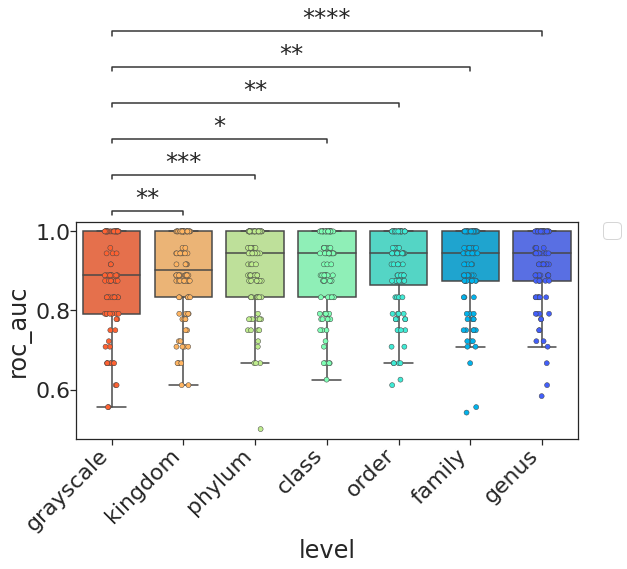

In [30]:
df = pd.read_pickle('./channel_IBD_results/dfres_10FCV_10times_genotype.pkl')
df1 = df[['level', 'repeat_seed', 'fold']]
df1['roc_auc'] = df.val_auc.apply(lambda x:x[-1])


dfp = df1

x = "level"
y = "roc_auc"
order = df1.level.unique()
color = sns.color_palette("rainbow_r", len(order)) #PiYG

figsize = (9, 4)

box = []
for i in range(len(order)):
    if i == 0:
        continue
    box.append((order[0], order[i]))
    

fig, ax = plt.subplots(figsize = figsize)


sns.boxplot(data=dfp, x=x, y=y, order=order, ax = ax, palette=color, fliersize=0, )
sns.stripplot(data=dfp, x=x, y=y, order=order, ax = ax, jitter=True, 
              size=5, palette=color, split=True,
              linewidth=0.5,edgecolor='gray')

#sns.barplot(data=dfp, x=x, y=y, order=order, hue = hue, hue_order=hue_order, ax = ax, palette="Set2")
# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

add_stat_annotation(ax, data = dfp, x=x, y=y, order=order, plot='boxplot',
                    box_pairs=box,
                    test='t-test_paired', 
                    text_format='star', 
                    loc='outside', verbose=2)

ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)

plt.xticks(rotation=45, ha = 'right')

fig.savefig("./channel_IBD_results/genotype_control_multichannel.pdf" ,  bbox_inches='tight')



p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 3: t-test paired samples with Bonferroni correction, P_val=2.992e-03 stat=-3.600e+00
1 v.s. 11: t-test paired samples with Bonferroni correction, P_val=1.311e-08 stat=-6.587e+00
1 v.s. 19: t-test paired samples with Bonferroni correction, P_val=3.954e-04 stat=-4.168e+00
1 v.s. 26: t-test paired samples with Bonferroni correction, P_val=4.403e-02 stat=-2.738e+00
1 v.s. 55: t-test paired samples with Bonferroni correction, P_val=2.922e-04 stat=-4.248e+00
1 v.s. 88: t-test paired samples with Bonferroni correction, P_val=3.226e-05 stat=-4.811e+00


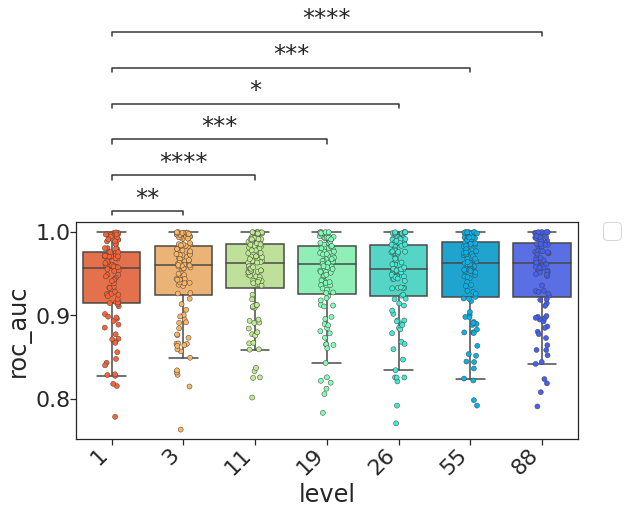

In [35]:
df = pd.read_pickle('./channel_Cirrhosis_results/dfres_10FCV_10times_phenotype.pkl')
df1 = df[['level', 'repeat_seed', 'fold']]
df1['roc_auc'] = df.val_auc.apply(lambda x:np.mean(x))


dfp = df1

x = "level"
y = "roc_auc"
order = df1.level.unique()
color = sns.color_palette("rainbow_r", len(order)) #PiYG

figsize = (9, 4)

box = []
for i in range(len(order)):
    if i == 0:
        continue
    box.append((order[0], order[i]))
    

fig, ax = plt.subplots(figsize = figsize)


sns.boxplot(data=dfp, x=x, y=y, order=order, ax = ax, palette=color, fliersize=0, )
sns.stripplot(data=dfp, x=x, y=y, order=order, ax = ax, jitter=True, 
              size=5, palette=color, split=True,
              linewidth=0.5,edgecolor='gray')

#sns.barplot(data=dfp, x=x, y=y, order=order, hue = hue, hue_order=hue_order, ax = ax, palette="Set2")
# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

add_stat_annotation(ax, data = dfp, x=x, y=y, order=order, plot='boxplot',
                    box_pairs=box,
                    test='t-test_paired', 
                    text_format='star', 
                    loc='outside', verbose=2)

ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)

plt.xticks(rotation=45, ha = 'right')

fig.savefig("./channel_Cirrhosis_results/phenotype_control_multichannel.pdf" ,  bbox_inches='tight')


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

grayscale v.s. kingdom: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.012e+00
grayscale v.s. phylum: t-test paired samples with Bonferroni correction, P_val=2.761e-02 stat=-2.900e+00
grayscale v.s. class: t-test paired samples with Bonferroni correction, P_val=3.177e-03 stat=-3.583e+00
grayscale v.s. order: t-test paired samples with Bonferroni correction, P_val=4.804e-05 stat=-4.712e+00
grayscale v.s. family: t-test paired samples with Bonferroni correction, P_val=1.924e-08 stat=-6.504e+00
grayscale v.s. genus: t-test paired samples with Bonferroni correction, P_val=9.179e-06 stat=-5.116e+00


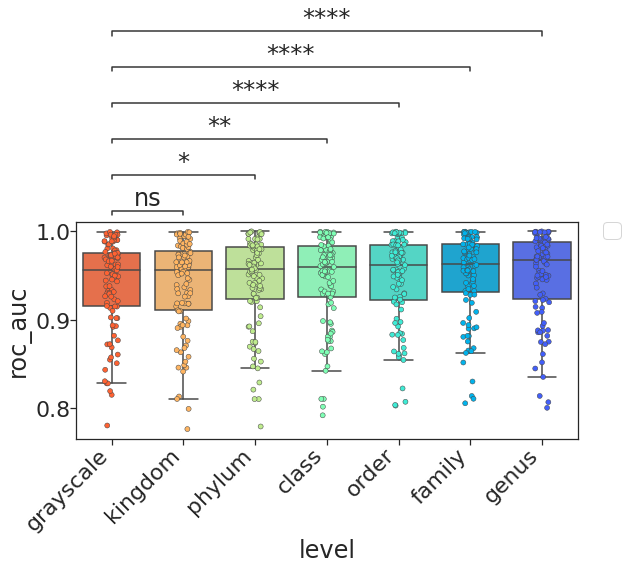

In [36]:
df = pd.read_pickle('./channel_Cirrhosis_results/dfres_10FCV_10times_genotype.pkl')
df1 = df[['level', 'repeat_seed', 'fold']]
df1['roc_auc'] = df.val_auc.apply(lambda x:np.mean(x))


dfp = df1

x = "level"
y = "roc_auc"
order = df1.level.unique()
color = sns.color_palette("rainbow_r", len(order)) #PiYG

figsize = (9, 4)

box = []
for i in range(len(order)):
    if i == 0:
        continue
    box.append((order[0], order[i]))
    

fig, ax = plt.subplots(figsize = figsize)


sns.boxplot(data=dfp, x=x, y=y, order=order, ax = ax, palette=color, fliersize=0, )
sns.stripplot(data=dfp, x=x, y=y, order=order, ax = ax, jitter=True, 
              size=5, palette=color, split=True,
              linewidth=0.5,edgecolor='gray')

#sns.barplot(data=dfp, x=x, y=y, order=order, hue = hue, hue_order=hue_order, ax = ax, palette="Set2")
# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

add_stat_annotation(ax, data = dfp, x=x, y=y, order=order, plot='boxplot',
                    box_pairs=box,
                    test='t-test_paired', 
                    text_format='star', 
                    loc='outside', verbose=2)

ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)

plt.xticks(rotation=45, ha = 'right')

fig.savefig("./channel_Cirrhosis_results/genotype_control_multichannel.pdf" ,  bbox_inches='tight')
